In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.3'

In [2]:
from keras.layers import SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('input_train shape:', (25000, 500))
('input_test shape:', (25000, 500))


In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.6532 - acc: 0.6035 - val_loss: 0.5645 - val_acc: 0.7162
Epoch 2/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.4276 - acc: 0.8159 - val_loss: 0.4174 - val_acc: 0.8214
Epoch 3/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.3191 - acc: 0.8724 - val_loss: 0.3843 - val_acc: 0.8256
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2553 - acc: 0.9013 - val_loss: 0.3484 - val_acc: 0.8566
Epoch 5/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.1879 - acc: 0.9284 - val_loss: 0.3738 - val_acc: 0.8704
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1501 - acc: 0.9453 - val_loss: 0.4149 - val_acc: 0.8440
Epoch 7/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.0988 - acc: 0.9662 - val_loss: 0.4932 - val_acc:

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.5150 - acc: 0.7592 - val_loss: 0.3838 - val_acc: 0.8622
Epoch 2/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.2912 - acc: 0.8856 - val_loss: 0.3272 - val_acc: 0.8586
Epoch 3/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2337 - acc: 0.9097 - val_loss: 0.3050 - val_acc: 0.8878
Epoch 4/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2015 - acc: 0.9272 - val_loss: 0.3816 - val_acc: 0.8768
Epoch 5/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1737 - acc: 0.9372 - val_loss: 0.3393 - val_acc: 0.8816
Epoch 6/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1567 - acc: 0.9431 - val_loss: 0.3522 - val_acc: 0.8860
Epoch 7/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1422 - acc: 0.9480 - val_loss: 0.3826 - val_ac

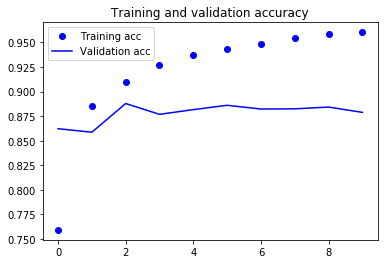

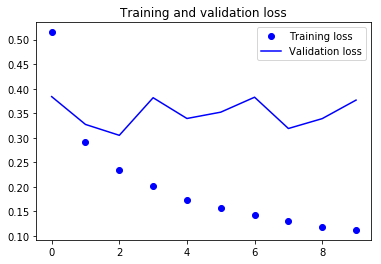

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()